In [17]:
from xgboost import XGBClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

C:\Users\dcdmm\anaconda3\envs\pytorch_env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [18]:
X = datasets.fetch_covtype().data[:3000]
y = datasets.fetch_covtype().target[:3000]
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_va, y_train, y_va = train_test_split(X_1, y_1)

print(X_train.shape, y_train.shape)
print(np.unique(y_train))  # 7分类任务

(2025, 54) (2025,)
[1 2 3 4 5 6 7]
(2025, 54) (2025,)
[1 2 3 4 5 6 7]


In [19]:
enc = OrdinalEncoder()

# y*.shape = (num_sample, 1)
y_train_enc = enc.fit_transform(y_train.reshape(-1, 1))
y_test_enc = enc.transform(y_test.reshape(-1, 1))
y_va_enc = enc.fit_transform(y_va.reshape(-1, 1))
print(np.unique(y_train_enc))
print(y_train_enc.shape)

[0. 1. 2. 3. 4. 5. 6.]
(2025, 1)
[0. 1. 2. 3. 4. 5. 6.]
(2025, 1)


In [20]:
# 不需要指定num_class参数
model = XGBClassifier(
    booster='gbtree',
    n_jobs=-1,  # 对应nthread
    max_depth=6,
    min_child_weight=2,
    gamma=0,
    learning_rate=0.3,
    subsample=1,
    colsample_bytree=0.9,
    colsample_bylevel=0.9,
    reg_alpha=0,
    reg_lambda=0,
    objective='multi:softprob',
    verbosity=0,
    use_label_encoder=False)

In [21]:
model.fit(X_train, y_train_enc,
          eval_set=[(X_train, y_train_enc), (X_va, y_va_enc)],  # 对应evals
          sample_weight=1 / (y_train_enc + 1),  # 对应DMatrix(weight)
          verbose=50,  # 对应evals
          eval_metric='mlogloss',  # 对应eval_metric+feval
          early_stopping_rounds=100,
          )

[0]	validation_0-mlogloss:1.41175	validation_1-mlogloss:1.47474
[50]	validation_0-mlogloss:0.10441	validation_1-mlogloss:0.49185
[99]	validation_0-mlogloss:0.05416	validation_1-mlogloss:0.49694


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

[0]	validation_0-mlogloss:1.42866	validation_1-mlogloss:1.47583
[50]	validation_0-mlogloss:0.10655	validation_1-mlogloss:0.48643
[99]	validation_0-mlogloss:0.05282	validation_1-mlogloss:0.49134


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

In [22]:
# 预测结果(num_sample, )
model.predict(X_test)

array([3, 4, 0, 4, 4, 0, 6, 5, 4, 4, 0, 2, 2, 1, 2, 4, 0, 4, 6, 4, 5, 3,
       2, 4, 4, 4, 4, 4, 5, 0, 4, 1, 0, 1, 0, 5, 2, 3, 0, 5, 0, 4, 1, 2,
       1, 0, 4, 1, 1, 3, 0, 1, 0, 4, 1, 5, 1, 4, 1, 1, 0, 1, 5, 4, 6, 1,
       5, 6, 4, 1, 1, 1, 0, 2, 5, 1, 2, 0, 0, 0, 0, 1, 1, 2, 6, 0, 0, 0,
       5, 6, 1, 4, 1, 1, 4, 1, 4, 3, 5, 0, 1, 4, 1, 2, 0, 4, 4, 6, 4, 4,
       4, 5, 4, 0, 4, 1, 1, 1, 4, 5, 4, 4, 1, 1, 0, 4, 0, 4, 1, 1, 2, 1,
       0, 4, 4, 5, 1, 1, 0, 3, 4, 4, 1, 0, 2, 4, 1, 4, 0, 4, 0, 1, 3, 1,
       5, 0, 1, 0, 6, 1, 4, 4, 1, 0, 1, 1, 3, 4, 4, 4, 1, 0, 4, 1, 2, 1,
       0, 2, 5, 4, 2, 1, 6, 1, 4, 1, 3, 0, 5, 4, 0, 4, 4, 0, 1, 5, 2, 2,
       1, 1, 4, 6, 5, 3, 0, 2, 1, 0, 0, 1, 1, 0, 1, 4, 1, 2, 1, 5, 1, 1,
       2, 0, 1, 1, 4, 1, 4, 1, 3, 1, 0, 0, 0, 0, 1, 0, 4, 5, 5, 1, 1, 0,
       4, 0, 2, 4, 0, 4, 4, 4, 1, 1, 0, 1, 2, 1, 4, 1, 6, 4, 1, 1, 4, 2,
       1, 4, 5, 3, 1, 1, 4, 1, 2, 4, 6, 1, 2, 0, 0, 1, 3, 0, 6, 5, 0, 0,
       4, 5, 1, 4, 0, 1, 1, 2, 5, 2, 4, 4, 3, 4], d

array([0, 4, 6, 0, 5, 5, 0, 4, 1, 1, 6, 1, 1, 6, 1, 2, 2, 4, 3, 2, 0, 4,
       2, 4, 5, 0, 1, 5, 5, 4, 4, 1, 1, 5, 3, 0, 3, 5, 4, 5, 3, 4, 1, 1,
       4, 1, 4, 1, 2, 4, 1, 5, 1, 4, 4, 4, 1, 4, 0, 0, 1, 1, 1, 1, 6, 1,
       4, 6, 1, 1, 3, 4, 1, 0, 4, 4, 4, 0, 4, 2, 4, 0, 1, 1, 6, 0, 1, 5,
       0, 0, 0, 4, 4, 5, 1, 1, 5, 0, 0, 0, 4, 4, 6, 1, 1, 0, 5, 1, 0, 1,
       3, 0, 5, 1, 1, 1, 0, 4, 2, 1, 4, 1, 4, 3, 6, 1, 3, 4, 5, 1, 4, 5,
       4, 1, 1, 1, 0, 0, 2, 1, 0, 4, 0, 6, 0, 0, 1, 5, 1, 1, 2, 4, 4, 1,
       1, 4, 4, 2, 1, 1, 1, 4, 6, 4, 5, 4, 0, 2, 1, 2, 2, 6, 1, 0, 4, 6,
       1, 5, 5, 1, 1, 2, 2, 0, 4, 4, 1, 1, 4, 1, 2, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 2, 4, 5, 1, 1, 0, 4, 1, 4, 4, 4, 6, 2, 0, 2, 4, 1, 1, 0,
       4, 5, 1, 4, 4, 3, 1, 4, 0, 0, 5, 4, 1, 1, 1, 1, 0, 3, 4, 0, 0, 5,
       4, 4, 0, 0, 0, 4, 1, 4, 2, 2, 1, 3, 1, 1, 0, 4, 2, 2, 0, 2, 1, 2,
       0, 0, 1, 4, 2, 4, 1, 4, 4, 3, 1, 2, 1, 1, 4, 4, 5, 2, 0, 2, 1, 0,
       0, 4, 2, 2, 4, 2, 2, 2, 1, 4, 1, 0, 4, 4], d

In [23]:
# 预测结果的概率矩阵
model.predict_proba(X_test)

array([[9.8961033e-04, 6.7181354e-03, 8.8336781e-02, ..., 9.7981666e-04,
        1.3111615e-02, 5.4209528e-04],
       [2.8097269e-04, 9.6393619e-03, 2.0211781e-04, ..., 9.8921216e-01,
        3.7110614e-04, 1.0327786e-04],
       [9.6464026e-01, 3.4043934e-02, 9.0772817e-05, ..., 8.7855320e-04,
        1.8516647e-04, 9.0785979e-05],
       ...,
       [1.0947906e-04, 1.7868226e-03, 4.8844726e-05, ..., 9.9795026e-01,
        2.5160956e-05, 4.6946730e-05],
       [1.7387039e-03, 1.0798902e-03, 2.3358312e-01, ..., 4.7115196e-04,
        2.7438446e-03, 1.9274876e-04],
       [4.5008073e-03, 1.3565551e-02, 1.2594773e-04, ..., 9.8077339e-01,
        3.2016361e-04, 3.0691712e-04]], dtype=float32)

array([[8.6237544e-01, 1.3556856e-01, 1.4547679e-04, ..., 3.8533122e-04,
        9.7300719e-05, 1.2493725e-03],
       [3.3554725e-02, 8.3174549e-02, 6.4751352e-05, ..., 8.8284928e-01,
        4.9911006e-05, 2.2154265e-04],
       [2.9692608e-01, 1.5314089e-02, 8.9582690e-04, ..., 7.6040026e-04,
        6.7959906e-04, 6.8488848e-01],
       ...,
       [5.3781420e-01, 7.5027734e-02, 7.6044572e-04, ..., 3.8115710e-01,
        1.8605231e-03, 2.1491579e-03],
       [2.3936124e-03, 9.4350614e-02, 5.3450803e-04, ..., 8.9706606e-01,
        5.1928149e-03, 2.9396499e-04],
       [2.9512131e-04, 1.6304334e-03, 1.4407473e-04, ..., 9.9765116e-01,
        1.1756031e-04, 7.6595265e-05]], dtype=float32)

In [24]:
# 准确率
model.score(X_test, y_test_enc)

0.8066666666666666

0.8266666666666667

In [25]:
model.evals_result_  # 对应evals_result

{'validation_0': OrderedDict([('mlogloss',
               [1.411752,
                1.157037,
                0.968774,
                0.832273,
                0.729606,
                0.647753,
                0.583209,
                0.532226,
                0.490972,
                0.456676,
                0.42569,
                0.39908,
                0.374494,
                0.352901,
                0.334039,
                0.321536,
                0.304366,
                0.289529,
                0.277554,
                0.26491,
                0.254328,
                0.245537,
                0.235066,
                0.225912,
                0.216116,
                0.207361,
                0.201237,
                0.195899,
                0.190113,
                0.181161,
                0.175695,
                0.170866,
                0.16371,
                0.159709,
                0.155263,
                0.14857,
                0.144659,


{'validation_0': OrderedDict([('mlogloss',
               [1.428657,
                1.17016,
                0.967136,
                0.826393,
                0.722673,
                0.642616,
                0.574112,
                0.521284,
                0.480395,
                0.44863,
                0.421613,
                0.394704,
                0.374703,
                0.350428,
                0.334901,
                0.317253,
                0.302502,
                0.290053,
                0.281039,
                0.270575,
                0.261046,
                0.248681,
                0.239906,
                0.229425,
                0.220897,
                0.213072,
                0.202161,
                0.195646,
                0.189453,
                0.185701,
                0.179218,
                0.170432,
                0.165908,
                0.161165,
                0.156215,
                0.152206,
                0.14848

In [26]:
# 特征相对重要性
model.feature_importances_

array([0.03945486, 0.01049425, 0.00700237, 0.01252271, 0.00967183,
       0.01849894, 0.00721627, 0.01002228, 0.0167348 , 0.01205723,
       0.09244852, 0.        , 0.0229918 , 0.11939687, 0.01283746,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00632628, 0.        ,
       0.02706174, 0.02079435, 0.        , 0.        , 0.01636575,
       0.22888424, 0.15976843, 0.        , 0.02015749, 0.        ,
       0.00591893, 0.02001037, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01013529, 0.0316904 , 0.        ,
       0.        , 0.01138371, 0.        , 0.        , 0.        ,
       0.        , 0.00565859, 0.04449436, 0.        ], dtype=float32)

array([0.03175605, 0.00628195, 0.00517955, 0.01096806, 0.00694401,
       0.01327787, 0.00588249, 0.00885626, 0.00975809, 0.00886319,
       0.05917036, 0.        , 0.00797575, 0.14814916, 0.007305  ,
       0.00403058, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00463658, 0.        ,
       0.03140442, 0.04196454, 0.        , 0.        , 0.00629493,
       0.27625325, 0.09226479, 0.        , 0.01501758, 0.        ,
       0.00795994, 0.01595691, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0063221 , 0.02343113, 0.        ,
       0.09465141, 0.00786797, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.04157607, 0.        ], dtype=float32)

In [27]:
# 保存训练好的模型
model.save_model("xgb1.model")

In [28]:
# 加载训练好的模型
bst = XGBClassifier()
bst.load_model('xgb1.model')
bst.score(X_test, y_test_enc)

0.8066666666666666

0.8266666666666667

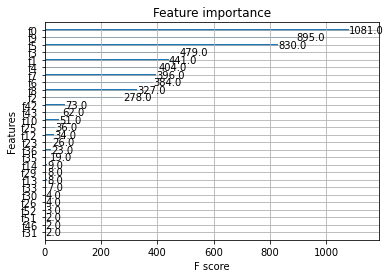

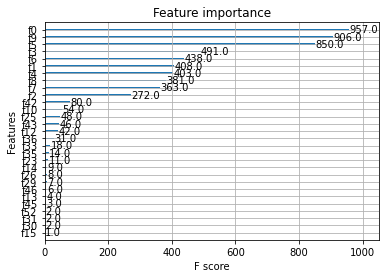

In [29]:
import matplotlib.pyplot as plt
import xgboost as xgb

# 绘制特征的相对重要性
xgb.plot_importance(model)
plt.show()

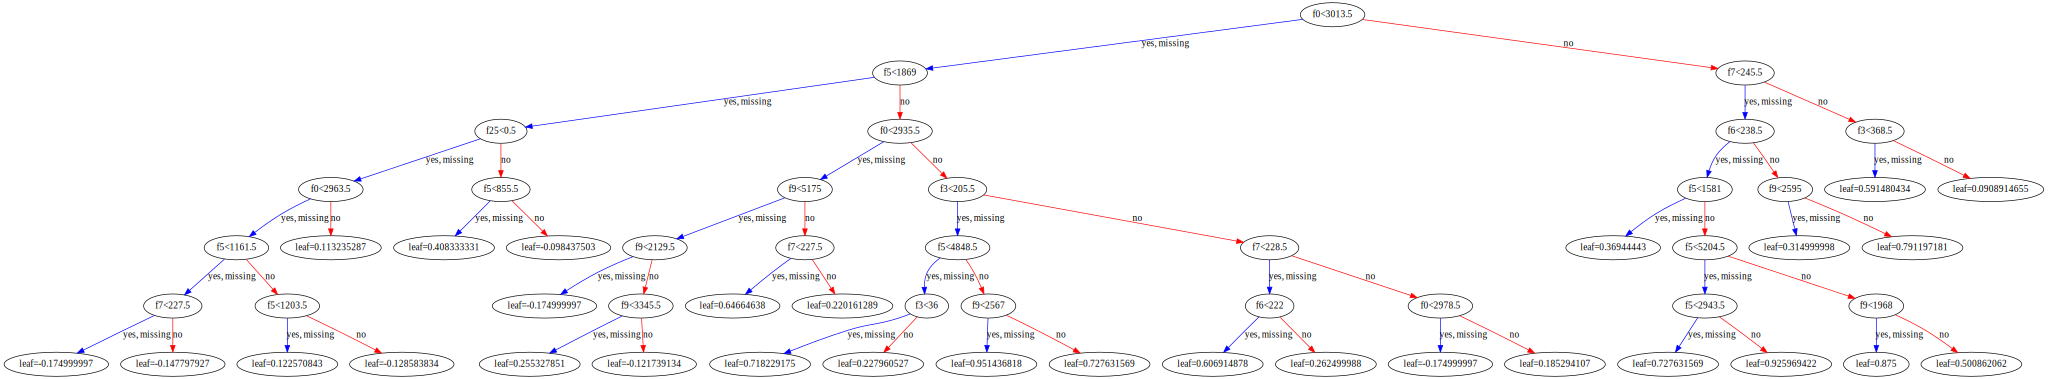

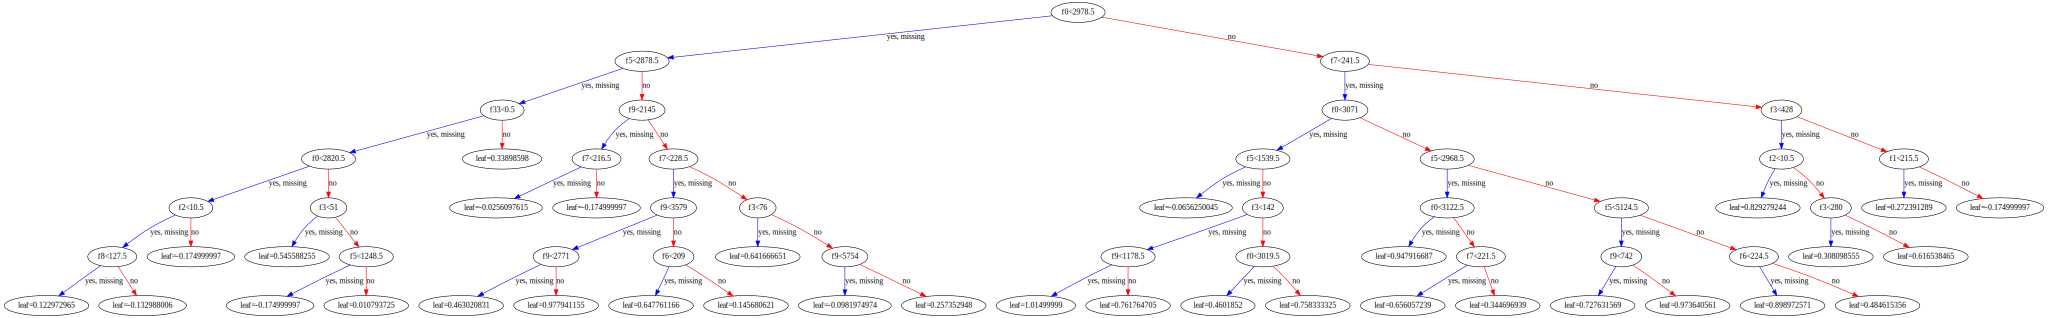

In [30]:
# 可视化lgb分割过程
xgb.to_graphviz(model)

In [31]:
df = model.get_booster().trees_to_dataframe()
df.head()

,Tree,Node,ID,Feature,Split,Yes,No,Missing,Gain,Cover,Category
0,0,0,0-0,f0,3013.5,0-1,0-2,0-1,316.672516,214.471741,NaN
1,0,1,0-1,f5,1869.0,0-3,0-4,0-3,46.934925,134.844910,NaN
2,0,2,0-2,f7,245.5,0-5,0-6,0-5,10.280823,79.626831,NaN
3,0,3,0-3,f25,0.5,0-7,0-8,0-7,4.057280,77.538780,NaN
4,0,4,0-4,f0,2935.5,0-9,0-10,0-9,9.468281,57.306126,NaN


,Tree,Node,ID,Feature,Split,Yes,No,Missing,Gain,Cover,Category
0,0,0,0-0,f0,2978.5,0-1,0-2,0-1,319.182648,213.461823,NaN
1,0,1,0-1,f5,2878.5,0-3,0-4,0-3,24.139511,124.200012,NaN
2,0,2,0-2,f7,241.5,0-5,0-6,0-5,19.725098,89.261810,NaN
3,0,3,0-3,f33,0.5,0-7,0-8,0-7,7.674603,91.800003,NaN
4,0,4,0-4,f9,2145.0,0-9,0-10,0-9,11.687069,32.400002,NaN


In [32]:
# 决策路径
df[df['Tree'] == 0]

,Tree,Node,ID,Feature,Split,Yes,No,Missing,Gain,Cover,Category
0,0,0,0-0,f0,3013.5,0-1,0-2,0-1,316.672516,214.471741,NaN
1,0,1,0-1,f5,1869.0,0-3,0-4,0-3,46.934925,134.844910,NaN
2,0,2,0-2,f7,245.5,0-5,0-6,0-5,10.280823,79.626831,NaN
3,0,3,0-3,f25,0.5,0-7,0-8,0-7,4.057280,77.538780,NaN
4,0,4,0-4,f0,2935.5,0-9,0-10,0-9,9.468281,57.306126,NaN
5,0,5,0-5,f6,238.5,0-11,0-12,0-11,3.854248,74.239075,NaN
6,0,6,0-6,f3,368.5,0-13,0-14,0-13,3.651482,5.387755,NaN
7,0,7,0-7,f0,2963.5,0-15,0-16,0-15,1.594393,71.048988,NaN
8,0,8,0-8,f5,855.5,0-17,0-18,0-17,4.430260,6.489796,NaN
9,0,9,0-9,f9,5175.0,0-19,0-20,0-19,11.357529,32.008167,NaN


,Tree,Node,ID,Feature,Split,Yes,No,Missing,Gain,Cover,Category
0,0,0,0-0,f0,2978.5,0-1,0-2,0-1,319.182648,213.461823,NaN
1,0,1,0-1,f5,2878.5,0-3,0-4,0-3,24.139511,124.200012,NaN
2,0,2,0-2,f7,241.5,0-5,0-6,0-5,19.725098,89.261810,NaN
3,0,3,0-3,f33,0.5,0-7,0-8,0-7,7.674603,91.800003,NaN
4,0,4,0-4,f9,2145.0,0-9,0-10,0-9,11.687069,32.400002,NaN
...,...,...,...,...,...,...,...,...,...,...,...
60,0,60,0-60,Leaf,NaN,NaN,NaN,NaN,0.344697,2.309038,NaN
61,0,61,0-61,Leaf,NaN,NaN,NaN,NaN,0.727632,2.326531,NaN
62,0,62,0-62,Leaf,NaN,NaN,NaN,NaN,0.973641,26.379011,NaN
63,0,63,0-63,Leaf,NaN,NaN,NaN,NaN,0.898973,8.938776,NaN
